# Keras - Functional API

#### Necessary Imports 

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import os

In [2]:
print(tf.__version__)

2.10.0


Dataset Source: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

#### Setting up Working Directory 

In [3]:
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\Wisconsin")

Importing the file into **pandas** dataframe

In [4]:
df = pd.read_csv("BreastCancer.csv")
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


For the column **Class** which is a response variable, the hot encoding / dummying needs to be done.

In [5]:
dum_df = pd.get_dummies(df)
dum_df.drop(['Class_Benign'],axis="columns",inplace = True)
dum_df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0


In [6]:
dum_df.shape

(699, 11)

We now create two separate objects for feature variables **X** and output variable **y**

In [7]:
X = dum_df.iloc[:,1:10]
y = dum_df.iloc[:,10]

In [8]:
X.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
0,5,4,3,1,2,2,2,3,1
1,9,1,2,6,4,10,7,7,2
2,10,4,7,2,2,8,6,1,1
3,6,10,10,10,8,10,7,10,7
4,1,1,1,1,2,5,5,1,1


In [9]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Class_Malignant, dtype: uint8

We now, split the data into train and test

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2019,stratify=y)

#### Scaling the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trn_scl = scaler.fit_transform(X_train) 
X_tst_scl = scaler.transform(X_test)   

In [12]:
(X_trn_scl.shape, y_train.shape)

((489, 9), (489,))

### Sequential Network: 

#### Model Definition

Using **Sequential API**

tf.random.set_seed(2019) <br>
model = tf.keras.models.Sequential([ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tf.keras.layers.Dense(6, activation='relu'),<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tf.keras.layers.Dense(4, activation='relu'), <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tf.keras.layers.Dense(1, activation='sigmoid')  <br>
])

Using **Functional API**

In [13]:
tf.random.set_seed(2019)
inputs = keras.Input(shape=(9,))
x = tf.keras.layers.Dense(6, activation="relu")(inputs)
x = tf.keras.layers.Dense(4, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

Conversion of objects **y_train** and **y_test** into numpy array for making those compatible with *TensorFlow*

In [15]:
y_train = y_train.values
y_test = y_test.values

**Model Fitting:**

In [16]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=100)

Epoch 1/100
16/16 - 3s - loss: 0.7836 - accuracy: 0.3047 - val_loss: 0.7018 - val_accuracy: 0.3524 - 3s/epoch - 187ms/step
Epoch 2/100
16/16 - 0s - loss: 0.7003 - accuracy: 0.3395 - val_loss: 0.6549 - val_accuracy: 0.3524 - 75ms/epoch - 5ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6576 - accuracy: 0.3476 - val_loss: 0.6312 - val_accuracy: 0.3857 - 73ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6318 - accuracy: 0.4417 - val_loss: 0.6116 - val_accuracy: 0.5095 - 71ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6106 - accuracy: 0.5317 - val_loss: 0.5931 - val_accuracy: 0.6571 - 73ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5923 - accuracy: 0.6789 - val_loss: 0.5739 - val_accuracy: 0.7429 - 75ms/epoch - 5ms/step
Epoch 7/100
16/16 - 0s - loss: 0.5748 - accuracy: 0.7362 - val_loss: 0.5563 - val_accuracy: 0.8095 - 69ms/epoch - 4ms/step
Epoch 8/100
16/16 - 0s - loss: 0.5578 - accuracy: 0.8548 - val_loss: 0.5394 - val_accuracy: 0.8619 - 74ms/epoch - 5ms/step
Epoch 9/100
16/1

In [17]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 6)                 60        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
%matplotlib inline

#### Training and Validation Curves 

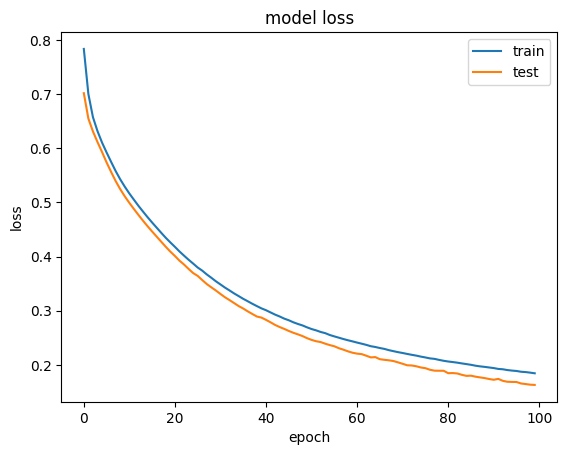

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#####  Log Loss

In [20]:
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

7/7 [==============================] - 0s 2ms/step


0.16308881841514017

##### Accuracy 

In [21]:
predict_prob = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


###### Probability [Malignant]:

In [22]:
predict_prob[:5]

array([[0.1268992 ],
       [0.12577589],
       [0.10720582],
       [0.10877944],
       [0.10720582]], dtype=float32)

In [23]:
predict_classes = np.where(predict_prob>=0.5,1,0)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9714285714285714


### Non-Sequential Network:

In [24]:
tf.random.set_seed(2019)
l1 = keras.Input(shape=(9,))
l2 = tf.keras.layers.Dense(7, activation="relu",name="L2")(l1)
l3 = tf.keras.layers.Dense(4, activation="relu",name="L3")(l2)
l4 = tf.keras.layers.Dense(3, activation="relu",name="L4")(l2)
concatenated = tf.keras.layers.Concatenate()([l3, l4])
l5 = tf.keras.layers.Dense(3, activation="relu",name="L5")(concatenated)
l6 = tf.keras.layers.Dense(1, activation="sigmoid",name="L6")(l5)
model = tf.keras.Model(inputs=l1, outputs=l6)

##### Network View

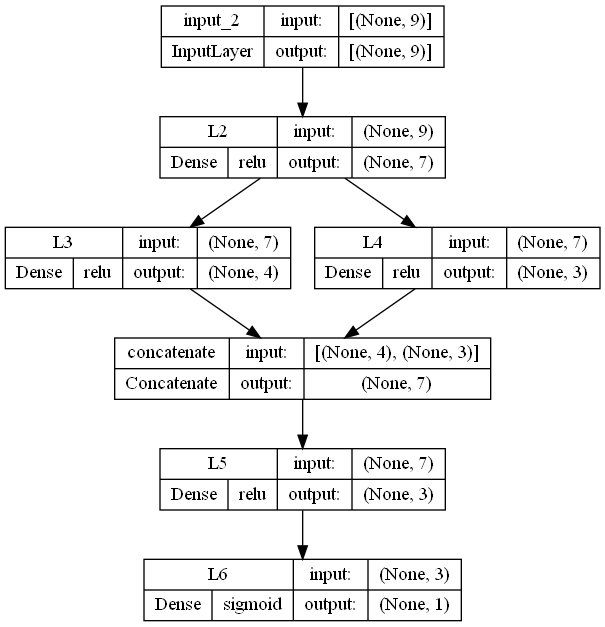

In [25]:
tf.keras.utils.plot_model(model,show_layer_activations=True,show_shapes=True)

In [26]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 L2 (Dense)                     (None, 7)            70          ['input_2[0][0]']                
                                                                                                  
 L3 (Dense)                     (None, 4)            32          ['L2[0][0]']                     
                                                                                                  
 L4 (Dense)                     (None, 3)            24          ['L2[0][0]']                     
                                                                                            

In [28]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=100)

Epoch 1/100
16/16 - 1s - loss: 0.7103 - accuracy: 0.3722 - val_loss: 0.6604 - val_accuracy: 0.5095 - 746ms/epoch - 47ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6504 - accuracy: 0.4499 - val_loss: 0.6280 - val_accuracy: 0.7714 - 79ms/epoch - 5ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6098 - accuracy: 0.5951 - val_loss: 0.5811 - val_accuracy: 0.4714 - 75ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 0.5668 - accuracy: 0.6830 - val_loss: 0.5292 - val_accuracy: 0.7714 - 78ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.5363 - accuracy: 0.8405 - val_loss: 0.5041 - val_accuracy: 0.9000 - 75ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5054 - accuracy: 0.8896 - val_loss: 0.4780 - val_accuracy: 0.8905 - 77ms/epoch - 5ms/step
Epoch 7/100
16/16 - 0s - loss: 0.4812 - accuracy: 0.8957 - val_loss: 0.4475 - val_accuracy: 0.9333 - 78ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.4567 - accuracy: 0.9059 - val_loss: 0.4229 - val_accuracy: 0.9333 - 72ms/epoch - 4ms/step
Epoch 9/100
16

#### Training and Validation Curves 

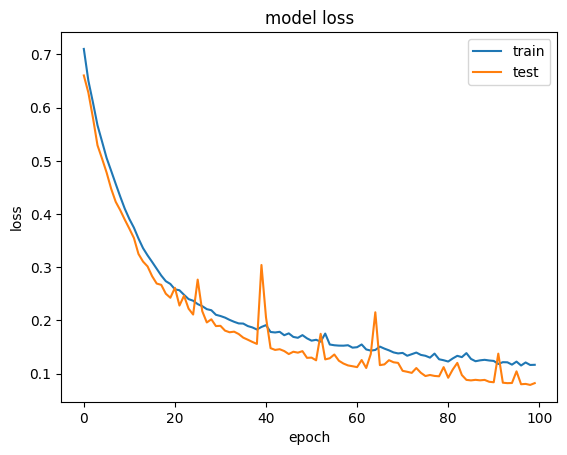

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##### Log Loss 

In [30]:
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

7/7 [==============================] - 0s 3ms/step


0.08217539243037858

##### Accuracy 

In [31]:
predict_prob = model.predict(X_test)
predict_classes = np.where(predict_prob>=0.5,1,0)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.9761904761904762
